<a href="https://colab.research.google.com/github/shoaib247964/-Financial-PhraseBank-Sentiment-Analysis-for-Financial-News-/blob/main/Real_And_Fake_News_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
# The 'error_bad_lines' argument is deprecated.
# Using 'on_bad_lines' instead to handle bad lines.
# 'quoting=3' is used to ignore quotes.
real_news = pd.read_csv('/content/True.csv', on_bad_lines='skip', quoting=3)
fake_news = pd.read_csv('/content/Fake.csv', on_bad_lines='skip', quoting=3)

# Add labels
real_news['label'] = 1  # 1 for real news
fake_news['label'] = 0  # 0 for fake news

# Combine datasets
news_df = pd.concat([real_news, fake_news]).sample(frac=1).reset_index(drop=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.2, random_state=42)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

def preprocess_text(text):
    # Check if text is a string before preprocessing
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize
        words = nltk.word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        # Return empty string if text is not a string
        return ''

# Apply preprocessing
X_train_processed = X_train.apply(preprocess_text)
X_test_processed = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# Convert text into numerical features using TF-IDF

import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the cleaned dataset
df = pd.read_csv("/content/Fake.csv")
df = pd.read_csv("/content/True.csv")

print(df.columns)


Index(['title', 'text', 'subject', 'date'], dtype='object')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load datasets separately
fake_df = pd.read_csv("/content/Fake.csv")
true_df = pd.read_csv("/content/True.csv")

# Add labels (0 = Fake, 1 = True)
fake_df["label"] = 0
true_df["label"] = 1

# Combine datasets
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# Define features (text) and labels (y)
X = df["text"]  # ✅ Use raw text data
y = df["label"]

# Feature Extraction (Optimized)
vectorizer = TfidfVectorizer(stop_words='english', max_features=8000, ngram_range=(1,2))  # ✅ Reduced features
X_tfidf = vectorizer.fit_transform(X)  # ✅ Keep as sparse matrix

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.15, random_state=42, stratify=y)

nb_model = MultinomialNB(alpha=0.05)
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)
print("Naïve Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_preds))

# ✅ Optimized Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=25, min_samples_split=4, min_samples_leaf=1,
    max_features='sqrt', bootstrap=True, random_state=42
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds))

# ✅ Optimized Ensemble Model
log_model = LogisticRegression(C=0.5, solver='liblinear', max_iter=200)
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model), ('rf', rf_model), ('log', log_model)],
    voting='soft', weights=[1, 2, 1]  # RF ko zyada weight diya
)
ensemble_model.fit(X_train, y_train)
ensemble_preds = ensemble_model.predict(X_test)
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print("Ensemble Model Accuracy:", ensemble_acc)






Naïve Bayes Accuracy: 0.956792873051225
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3522
           1       0.95      0.96      0.95      3213

    accuracy                           0.96      6735
   macro avg       0.96      0.96      0.96      6735
weighted avg       0.96      0.96      0.96      6735

Random Forest Accuracy: 0.9965850037119525
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3522
           1       1.00      1.00      1.00      3213

    accuracy                           1.00      6735
   macro avg       1.00      1.00      1.00      6735
weighted avg       1.00      1.00      1.00      6735

Ensemble Model Accuracy: 0.9875278396436525


Cross-Validation Accuracy: 0.9867


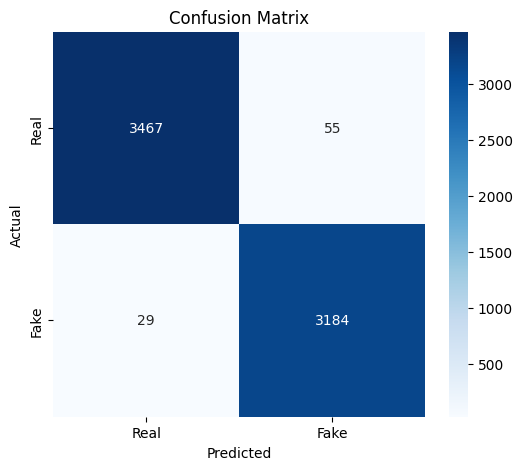

In [3]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Cross-validation
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ensemble_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
import pickle

# Save models
with open('naive_bayes.pkl', 'wb') as nb_file:
    pickle.dump(nb_model, nb_file)

with open('random_forest.pkl', 'wb') as rf_file:
    pickle.dump(rf_model, rf_file)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Models and vectorizer saved successfully!")



Models and vectorizer saved successfully!


In [8]:
!pip install fastapi uvicorn flask-ngrok joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00


In [13]:
!ngrok config add-authtoken 2uqtOeB9blxeBeCLbp6v48rnrNb_46CwtBUgb5kFFJw7TCMw2

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [21]:
import joblib

# Load trained model and vectorizer
model = joblib.load("/content/random_forest.pkl")  # Make sure model file exists
vectorizer = joblib.load("/content/vectorizer.pkl")  # Load the saved vectorizer

# Function for prediction
def predict_news(news_text):
    news_vectorized = vectorizer.transform([news_text])  # Convert text to numerical form
    prediction = model.predict(news_vectorized)[0]
    result = "Fake" if prediction == 1 else "Real"
    return result

# Example Usage
news = "Breaking news! A new policy has been implemented."
prediction = predict_news(news)
print(f"News Classification: {prediction}")



News Classification: Real


In [ ]:
import joblib

# Load trained model and vectorizer
model = joblib.load("/content/random_forest.pkl")
vectorizer = joblib.load("/content/vectorizer.pkl")

# Function for prediction
def predict_news():
    news_text = input("Enter news text: ")  # User se real-time input le raha hai
    news_vectorized = vectorizer.transform([news_text])
    prediction = model.predict(news_vectorized)[0]
    result = "Fake" if prediction == 1 else "Real"
    print(f"\n📰 News Classification: {result}\n")

# Run real-time classification loop
while True:
    predict_news()


Enter news text: Scientists discover a secret ingredient in Coca-Cola that makes people addicted within seconds!

📰 News Classification: Real

Enter news text: Elon Musk to launch a new city on Mars by next year with free houses for humans

📰 News Classification: Real

Enter news text: SHOAIB BUILD  ELON MUSK BUILDING

📰 News Classification: Real

